In [3]:
import json
import torch
from omegaconf import OmegaConf

from utils import get_or_create_experiment

name = "spiffy-fish-529"
experiment_id = get_or_create_experiment("ucc-drn-bin-1")

path = "D:/UCC-DRN-Pytorch/mnist/mlruns/655918802387583428/a57bead0163342708356610a696616b2/artifacts/best_model.pth/data/model.pth"

In [4]:
import optuna
import mlflow

experiment_id = get_or_create_experiment("ucc-drn-distil")
runs = mlflow.search_runs(experiment_ids=[experiment_id], output_format="pandas")

In [5]:
one_layer = runs[(runs["params.num_layers"]=="1")&(runs["metrics.eval_ucc_acc"].apply(lambda x: float(x)>=0.99))] 

In [6]:
run = one_layer.iloc[0]

In [40]:
two_layer = runs[(runs["params.num_layers"]=="2")&(runs["metrics.eval_ucc_acc"].apply(lambda x: float(x)>=0.99))] 

for index, run in two_layer.iterrows():
    artifact_path = run["artifact_uri"].replace("file:///", "")
    model_path = artifact_path+"/best_model.pth/data/model.pth"
    model = torch.load(model_path)
    for name, tensor in model.named_parameters():
        _, layer_num, param_name = name.split(".")
        if param_name == "W":
            print("Layer:", layer_num)
            with torch.no_grad():
                std, mean = torch.std_mean(tensor, dim=1)
            print(std.mean())
            print(mean.mean())

Layer: 0
tensor(14.3881, device='cuda:0')
tensor(4.3295, device='cuda:0')
Layer: 1
tensor(5.9847, device='cuda:0')
tensor(-6.3631, device='cuda:0')
Layer: 2
tensor(26.2404, device='cuda:0')
tensor(-1.5521, device='cuda:0')
Layer: 0
tensor(6.3948, device='cuda:0')
tensor(-0.6667, device='cuda:0')
Layer: 1
tensor(4.6895, device='cuda:0')
tensor(-2.4064, device='cuda:0')
Layer: 2
tensor(11.8968, device='cuda:0')
tensor(6.6463, device='cuda:0')
Layer: 0
tensor(14.6645, device='cuda:0')
tensor(1.7735, device='cuda:0')
Layer: 1
tensor(6.0440, device='cuda:0')
tensor(-7.3318, device='cuda:0')
Layer: 2
tensor(21.3170, device='cuda:0')
tensor(-7.6523, device='cuda:0')
Layer: 0
tensor(12.0040, device='cuda:0')
tensor(3.8762, device='cuda:0')
Layer: 1
tensor(9.4643, device='cuda:0')
tensor(-2.7738, device='cuda:0')
Layer: 2
tensor(19.1385, device='cuda:0')
tensor(14.9297, device='cuda:0')
Layer: 0
tensor(17.6773, device='cuda:0')
tensor(5.9125, device='cuda:0')
Layer: 1
tensor(12.2515, device='cu

C:\Users\progu\AppData\Local\Temp\ipykernel_20148\1776194652.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


In [ ]:
for index, run in one_layer.iterrows():
    artifact_path = run["artifact_uri"].replace("file:///", "")
    model_path = artifact_path+"/best_model.pth/data/model.pth"
    model = torch.load(model_path)
    for name, tensor in model.named_parameters():
        _, layer_num, param_name = name.split(".")
        if param_name == "W":
            print("Layer:", layer_num)
            with torch.no_grad():
                std, mean = torch.std_mean(tensor, dim=1)
            print(std.mean())
            print(mean.mean())

Layer: 0
tensor(20.0721, device='cuda:0')
tensor(4.4015, device='cuda:0')
Layer: 1
tensor(19.6024, device='cuda:0')
tensor(9.0329, device='cuda:0')
Layer: 0
tensor(39.0558, device='cuda:0')
tensor(12.6559, device='cuda:0')
Layer: 1
tensor(19.8545, device='cuda:0')
tensor(10.4613, device='cuda:0')


C:\Users\progu\AppData\Local\Temp\ipykernel_20148\561655813.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


In [ ]:
model

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

drn.0.W
torch.Size([9, 10])
tensor(20.0721, device='cuda:0')
tensor(4.4015, device='cuda:0')
drn.0.ba
torch.Size([9, 1])
drn.0.bq
torch.Size([9, 1])
drn.0.lama
torch.Size([9, 1])
drn.0.lamq
torch.Size([9, 1])
drn.1.W
torch.Size([1, 9])
tensor(19.6024, device='cuda:0')
tensor(9.0329, device='cuda:0')
drn.1.ba
torch.Size([1, 1])
drn.1.bq
torch.Size([1, 1])
drn.1.lama
torch.Size([1, 1])
drn.1.lamq
torch.Size([1, 1])


In [5]:
run.to_dictionary()

{'info': {'artifact_uri': 'file:///D:/UCC-DRN-Pytorch/mnist/mlruns/655918802387583428/a57bead0163342708356610a696616b2/artifacts',
  'end_time': 1742747069373,
  'experiment_id': '655918802387583428',
  'lifecycle_stage': 'active',
  'run_id': 'a57bead0163342708356610a696616b2',
  'run_name': 'spiffy-fish-529',
  'run_uuid': 'a57bead0163342708356610a696616b2',
  'start_time': 1742744254575,
  'status': 'FINISHED',
  'user_id': 'guanyu'},
 'data': {'metrics': {'eval_ucc_acc': 0.7090000000000001,
   'eval_ucc_loss': 1.014748454093933,
   'train_ucc_acc': 0.75,
   'train_ucc_loss': 1.014748454093933},
  'params': {'hidden_q': '93'},
  'tags': {'mlflow.log-model.history': '[{"run_id": "a57bead0163342708356610a696616b2", "artifact_path": "best_model.pth", "utc_time_created": "2025-03-23 15:42:24.686138", "model_uuid": "cd81bceaf4f04838ac7b7b4bc64e815b", "flavors": {"pytorch": {"model_data": "data", "pytorch_version": "2.5.1+cu124", "code": null}, "python_function": {"pickle_module_name": "m

## Intuition

Check for correlations between weight distributions between first layers, intermediate layers and last layers.

In [6]:
run_path = "mlruns/655918802387583428/a57bead0163342708356610a696616b2" 
config_path = "mlruns/655918802387583428/a57bead0163342708356610a696616b2/artifacts/config.yaml"
best_model_path = "mlruns/655918802387583428/a57bead0163342708356610a696616b2/artifacts/best_model.pth/data/model.pth"

In [13]:
cfg = OmegaConf.load(config_path)

In [ ]:
model = UCCDRNModel(cfg=cfg)

(93, 10)
(93, 93)
(4, 93)


In [7]:
state_dict = torch.load(best_model_path)

C:\Users\progu\AppData\Local\Temp\ipykernel_94180\476019552.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(best_model_path)


In [8]:
state_dict

UCCDRNModel(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): WideResidualBlock(
      (blocks): Sequential(
        (0): ResBlockZeroPadding(
          (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (skip_conv): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
        )
      )
    )
    (2): WideResidualBlock(
      (blocks): Sequential(
        (0): ResBlockZeroPadding(
          (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (skip_conv): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2))
        )
      )
    )
    (3): WideResidualBlock(
      (blocks): Sequential(
        (0): ResBlockZeroPadding(
          (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)

In [17]:
layers = list(state_dict.ucc_classifier.modules())[1:-1]

In [18]:
l = layers[0]

In [31]:
l.W.transpose(1,0).cpu().detach().numpy()[0]

array([-1.7021433 ,  4.375476  , -0.0513792 , -0.2578899 ,  4.265598  ,
       -1.84407   ,  0.12229037, -1.710676  , -0.9809153 ], dtype=float32)

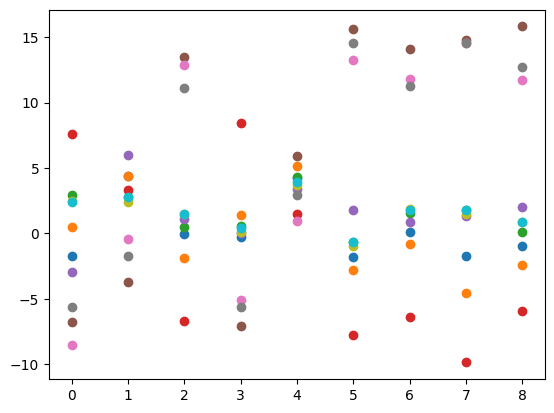

In [45]:
import matplotlib.pyplot as plt
weights = l.W.transpose(1,0).cpu().detach().numpy()
for weight in weights:
    plt.scatter(range(len(weight)),weight)

In [ ]:
l.bq
# plt.scatter(weights, range(len(weights)) )

Parameter containing:
tensor([[-0.0183],
        [ 0.1702],
        [ 0.0104],
        [ 0.0011],
        [ 0.0740],
        [ 0.0046],
        [ 0.0156],
        [-1.0361],
        [ 0.0144]], device='cuda:0', requires_grad=True)

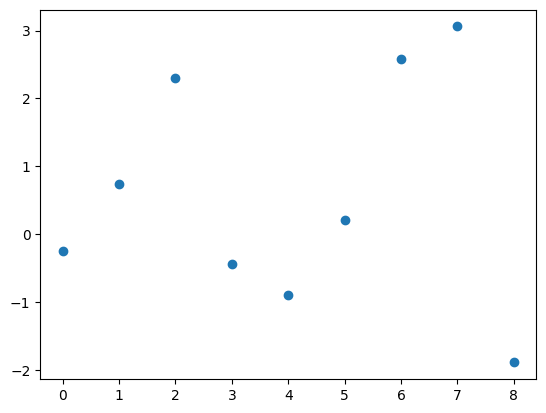

In [41]:
ba = l.ba.cpu().detach().numpy()

plt.scatter(range(len(ba)), ba)

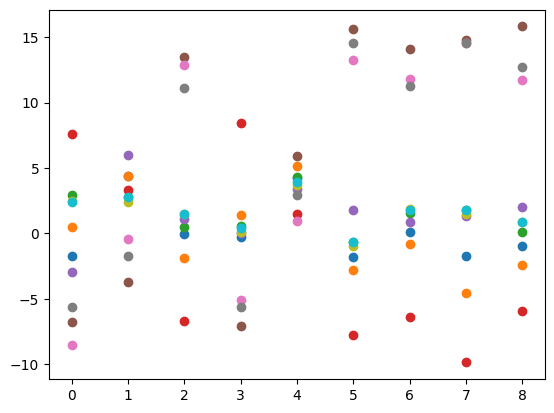

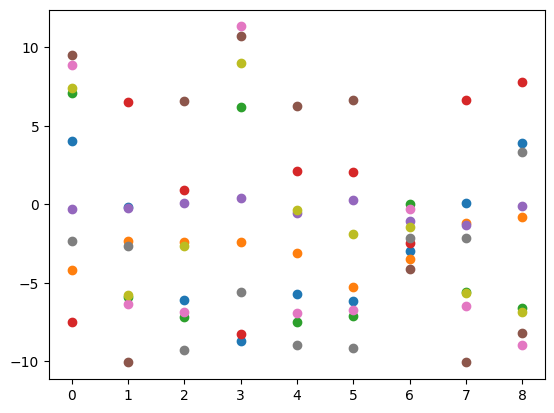

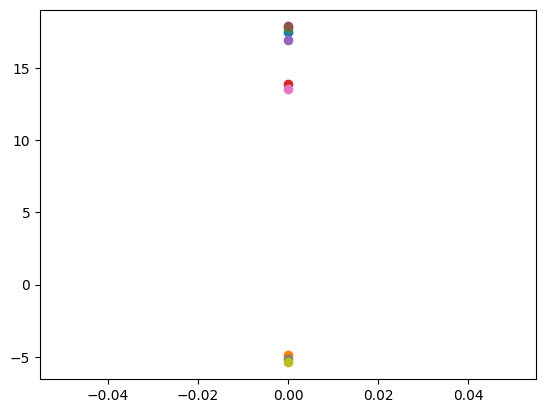

In [ ]:
# try plotting values of weights

import matplotlib.pyplot as plt

with torch.no_grad():
    for layer in layers:
        weights = layer.W.transpose(1,0).cpu().detach().numpy()
        for weight in weights:
            plt.scatter(range(len(weight)),weight)``
        plt.show()

In [52]:
experiment_id = "380446538050732248"
run_id = "b44135ad417048419a8777be80e40ed8"
best_model_path = f"mlruns/{experiment_id}/{run_id}/artifacts/best_model.pth/data/model.pth"

In [53]:
state_dict_2 = torch.load(best_model_path)

C:\Users\progu\AppData\Local\Temp\ipykernel_94180\2505766551.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict_2 = torch.load(best_model_path)


In [58]:
layers_2 = state_dict_2.drn[:-1]

In [71]:
config = OmegaConf.load(config_path)

(tensor([62.0637, 40.2439, 77.4321, 22.0562, 44.4610, 55.5991, 36.3241,  1.0369,
        50.3915,  0.9497], device='cuda:0', grad_fn=<StdMeanBackward0>), tensor([33.9262,  8.4609, 29.4064,  0.9367,  9.3705, 19.0424, 12.4742, -0.7888,
        14.3828, -0.6524], device='cuda:0', grad_fn=<StdMeanBackward0>))


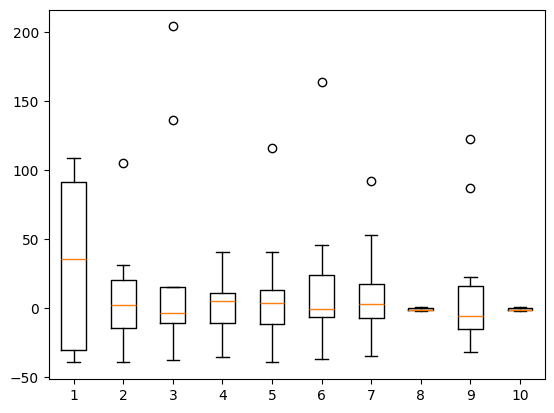

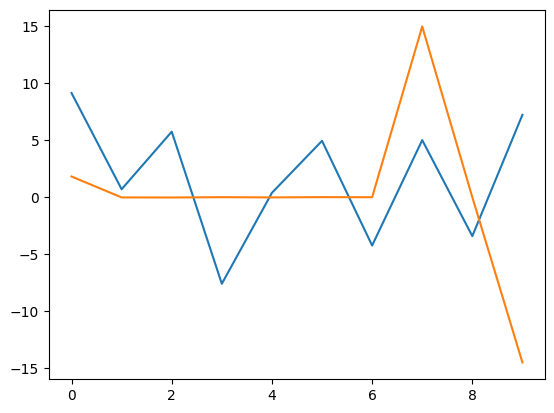

(tensor([19.8545], device='cuda:0', grad_fn=<StdMeanBackward0>), tensor([10.4613], device='cuda:0', grad_fn=<StdMeanBackward0>))


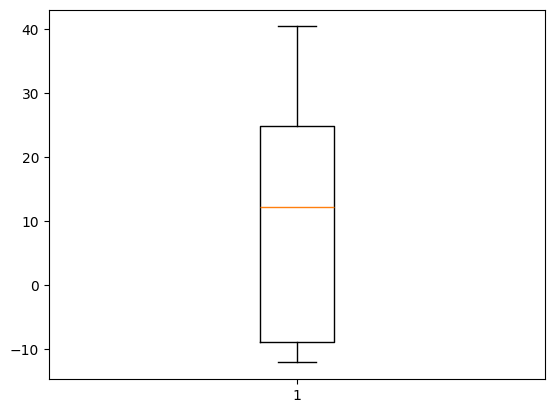

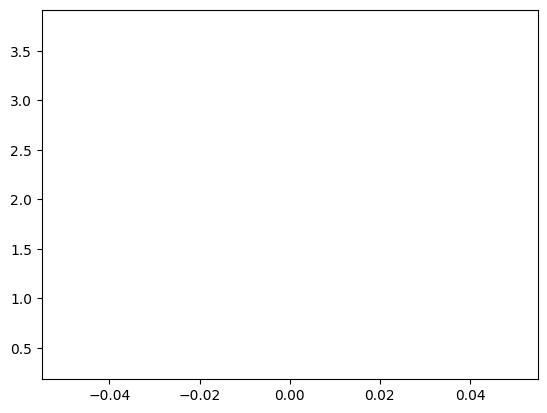

In [70]:
for layer in layers_2:
    print(torch.std_mean(layer.W.transpose(1,0), dim=0))
    weights = layer.W.transpose(1,0).cpu().detach().numpy()
    ba = layer.ba.cpu().detach().numpy()
    bq = layer.bq.cpu().detach().numpy()
    
    # for weight in weights:
    plt.boxplot(weights)
    plt.show()
    plt.plot(ba)
    plt.plot(bq)
    plt.show()
    

In [73]:
from model import UCCDRNModel
model = UCCDRNModel(config)

(93, 10)
(93, 93)
(4, 93)
